In [4]:
import os
import sys
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import cv2

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

from src.configs.config import DATA_RAW_PATH, CLASSES

Distribusi Kelas:
{'Berawan (Cloudy)': 300, 'Hujan (Rain)': 300, 'Cerah (Sunrise, Shiny)': 300, 'Berkabut (Foggy)': 300}


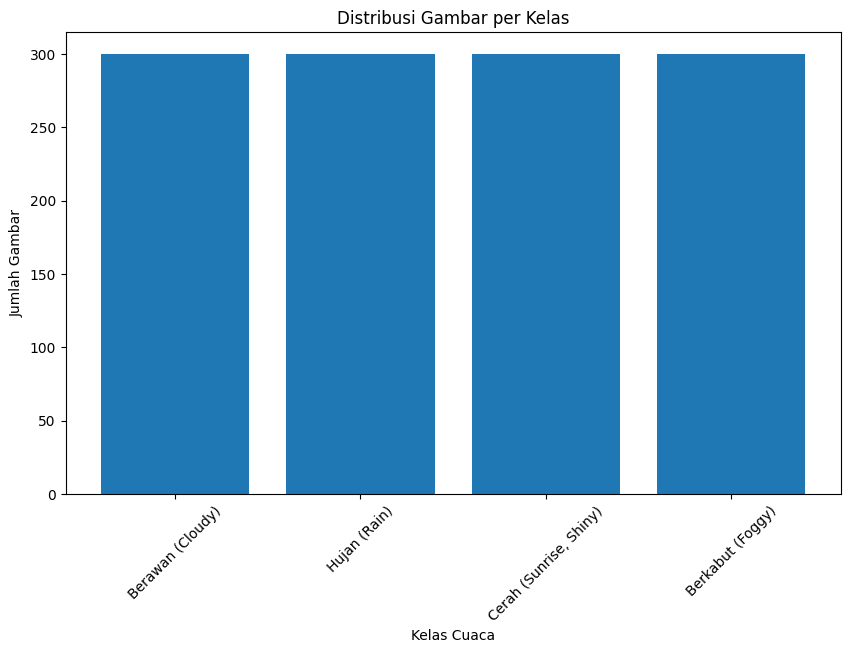

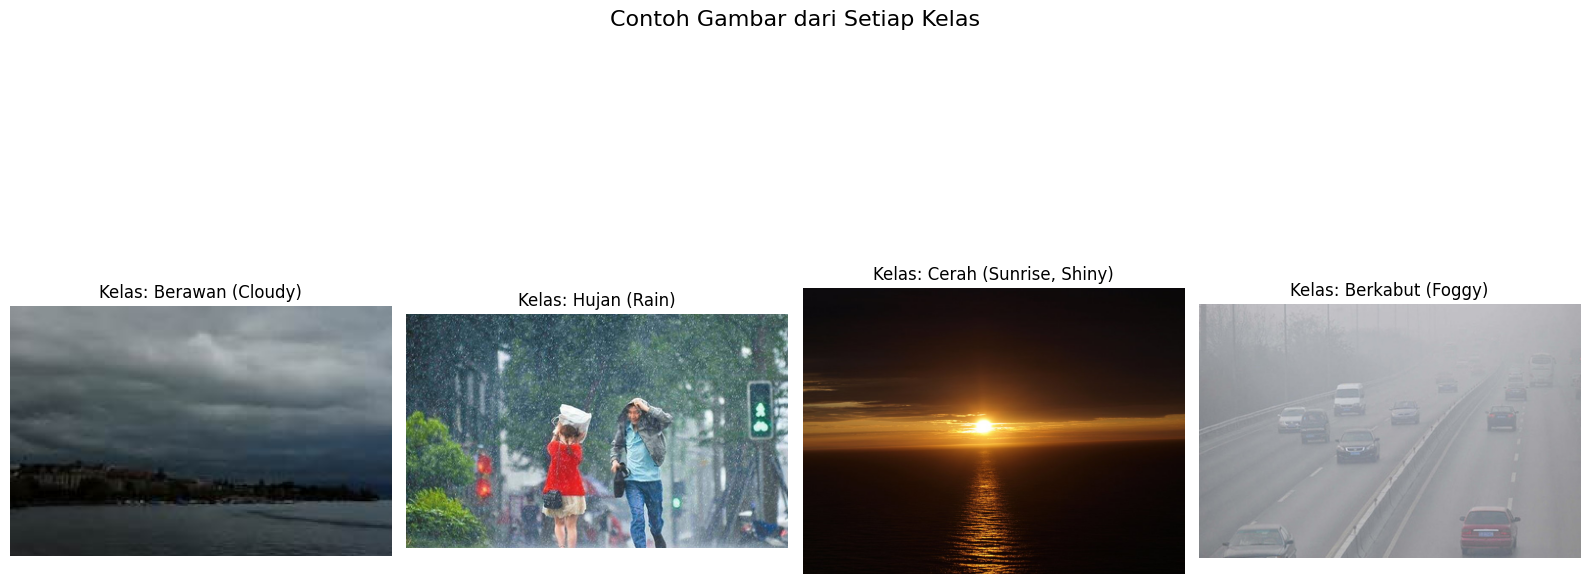

In [5]:
class_counts = {}
for class_name in CLASSES:
    class_path = os.path.join(DATA_RAW_PATH, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

print("Distribusi Kelas:")
print(class_counts)

# Visualisasi Grafik Distribusi
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.title('Distribusi Gambar per Kelas')
plt.xlabel('Kelas Cuaca')
plt.ylabel('Jumlah Gambar')
plt.xticks(rotation=45)
plt.show()

num_classes = len(CLASSES)
cols = 4
rows = int(np.ceil(num_classes / cols))
fig, axs = plt.subplots(rows, cols, figsize=(16, 8))
fig.suptitle('Contoh Gambar dari Setiap Kelas', fontsize=16)

for i, class_name in enumerate(CLASSES):
    class_path = os.path.join(DATA_RAW_PATH, class_name)
    if not os.path.isdir(class_path): continue
    
    random_image_name = np.random.choice(os.listdir(class_path))
    img_path = os.path.join(class_path, random_image_name)
    
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    ax = axs[i]
    ax.imshow(img_rgb)
    ax.set_title(f'Kelas: {class_name}')
    ax.axis('off')
    
for j in range(num_classes, rows * cols):
    axs.flatten()[j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()